In [1]:
# Working on the same concept with videos as input
# Import the necessary FER() packages for Video Processing

In [1]:
pip install FER

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 9.4 MB/s eta 0:00:000m eta 0:00:0136m0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.2 MB/s eta 0:00:0031m25.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.3/388.3 KB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.1 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached tqdm-4.66.1-py3-none-any.whl (78 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 19.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.2/313.2 KB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 18.0 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 3.8 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached Jinja2

In [8]:
from fer import Video
from fer import FER
import os
import sys
import pandas as pd
# Put in the location of the video file that has to be processed
location_videofile = "input/Video_One.mp4"

In [9]:
# But the Face detection detector
face_detector = FER(mtcnn=True)
# Input the video for processing
input_video = Video(location_videofile)

In [10]:
# The Analyze() function will run analysis on every frame of the input video. 
# It will create a rectangular box around every image and show the emotion values next to that.
# Finally, the method will publish a new video that will have a box around the face of the human with live emotion values.
processing_data = input_video.analyze(face_detector, display=False)

INFO:fer:30.00 fps, 583 frames, 19.43 seconds
INFO:fer:Making directories at output
INFO:fer:Deleted pre-existing output/Video_One_output.mp4
  0%|          | 0/583 [00:00<?, ?frames/s]

100%|██████████| 583/583 [12:51<00:00,  1.32s/frames]
INFO:fer:Completed analysis: saved to output/Video_One_output.mp4
INFO:fer:Starting to Zip
INFO:fer:Compressing: 8%
INFO:fer:Compressing: 17%
INFO:fer:Compressing: 25%
INFO:fer:Compressing: 34%
INFO:fer:Compressing: 42%
INFO:fer:Compressing: 51%
INFO:fer:Compressing: 60%
INFO:fer:Compressing: 68%
INFO:fer:Compressing: 77%
INFO:fer:Compressing: 85%
INFO:fer:Compressing: 94%
INFO:fer:Zip has finished


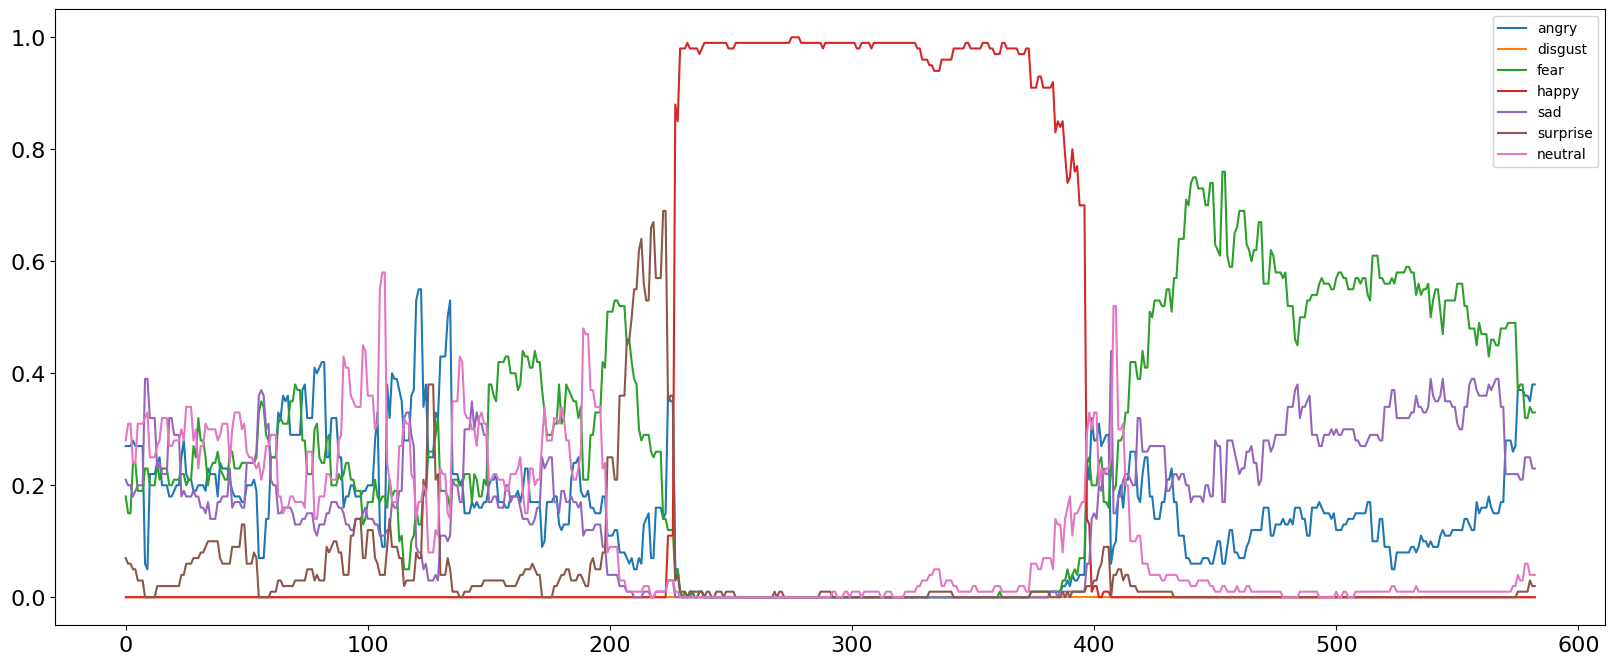

In [11]:
# We will now convert the analysed information into a dataframe.
# This will help us import the data as a .CSV file to perform analysis over it later
vid_df = input_video.to_pandas(processing_data)
vid_df = input_video.get_first_face(vid_df)
vid_df = input_video.get_emotions(vid_df)

# Plotting the emotions against time in the video
pltfig = vid_df.plot(figsize=(20, 8), fontsize=16).get_figure()

In [10]:
# We will now work on the dataframe to extract which emotion was prominent in the video
angry = sum(vid_df.angry)
disgust = sum(vid_df.disgust)
fear = sum(vid_df.fear)
happy = sum(vid_df.happy)
sad = sum(vid_df.sad)
surprise = sum(vid_df.surprise)
neutral = sum(vid_df.neutral)

emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
emotions_values = [angry, disgust, fear, happy, sad, surprise, neutral]

score_comparisons = pd.DataFrame(emotions, columns = ['Human Emotions'])
score_comparisons['Emotion Value from the Video'] = emotions_values
score_comparisons

,Human Emotions,Emotion Value from the Video
0,Angry,76.78
1,Disgust,0.01
2,Fear,156.73
3,Happy,163.22
4,Sad,89.77
5,Surprise,28.33
6,Neutral,67.22


23-07-2021:11:58:09,106 INFO     [classes.py:234] 30.00 fps, 458 frames, 15.27 seconds
23-07-2021:11:58:09,108 INFO     [classes.py:241] Making directories at output
23-07-2021:12:04:32,243 INFO     [classes.py:351] Completed analysis: saved to output/Video_Two_output.mp4


Starting to Zip
Compressing: 10%
Compressing: 21%
Compressing: 32%
Compressing: 43%
Compressing: 54%
Compressing: 65%
Compressing: 76%
Compressing: 87%
Compressing: 98%
Zip has finished


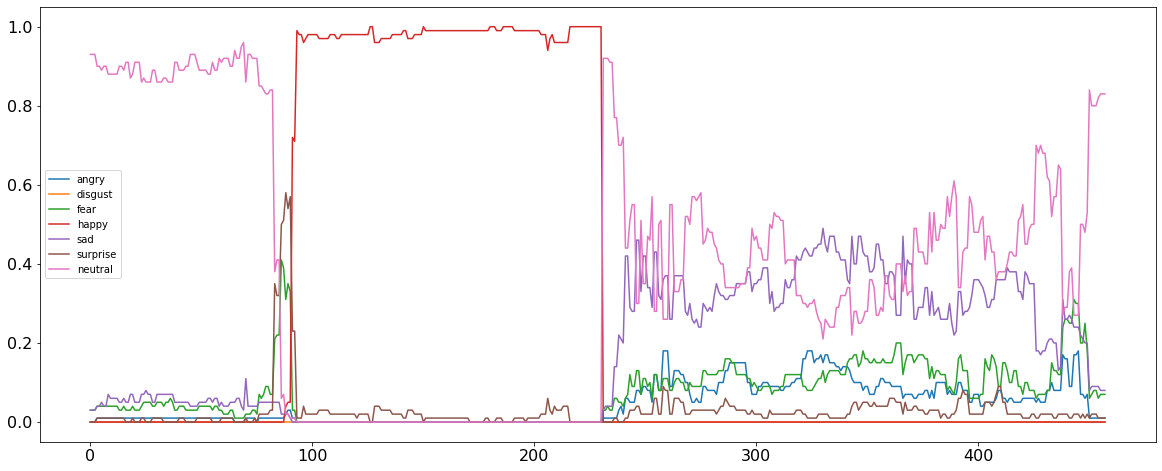

In [11]:
# We will conclude the project by experimenting the code on another video
location_videofile_two = "/content/Video_Two.mp4"
input_video_two = Video(location_videofile_two)
processing_data_two = input_video_two.analyze(face_detector, display=False)

vid_df_2 = input_video_two.to_pandas(processing_data_two)
vid_df_2 = input_video_two.get_first_face(vid_df_2)
vid_df_2 = input_video_two.get_emotions(vid_df_2)

pltfig = vid_df_2.plot(figsize=(20, 8), fontsize=16).get_figure()

In [12]:
angry_2 = sum(vid_df_2.angry)
disgust_2 = sum(vid_df_2.disgust)
fear_2 = sum(vid_df_2.fear)
happy_2 = sum(vid_df_2.happy)
sad_2 = sum(vid_df_2.sad)
surprise_2 = sum(vid_df_2.surprise)
neutral_2 = sum(vid_df_2.neutral)

emotions_values_2 = [angry_2, disgust_2, fear_2, happy_2, sad_2, surprise_2, neutral_2]
score_comparisons = pd.DataFrame(emotions, columns = ['Human Emotions'])
score_comparisons['Emotion Value from the Video'] = emotions_values_2
score_comparisons

,Human Emotions,Emotion Value from the Video
0,Angry,20.80
1,Disgust,0.00
2,Fear,32.58
3,Happy,137.37
4,Sad,76.43
5,Surprise,13.04
6,Neutral,177.10
